In [8]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

test_data = pd.read_csv("test.csv")
train_data = pd.read_csv("train.csv")

#top 10 records
train_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [9]:
#basic statistical description
train_data.describe()

#here we can see that LoanAmount, Loan_Amount_Term, Credit_History have some missing values which need data munging

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
#freq of values in column Property_Area
train_data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

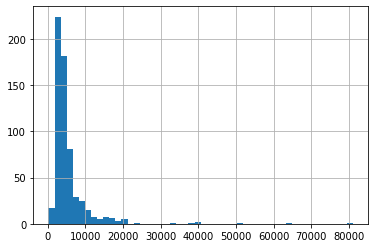

In [17]:
#histogram plot for ApplicantIncome
train_data["ApplicantIncome"].hist(bins=50)

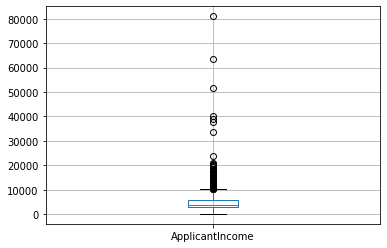

In [18]:
#boxplot for ApplicantIncome
train_data.boxplot(column = 'ApplicantIncome')
#here it shows the extreme/outliers values- income disparity in the society
#ApplicantIncome has extreme values that need deeper understanding 

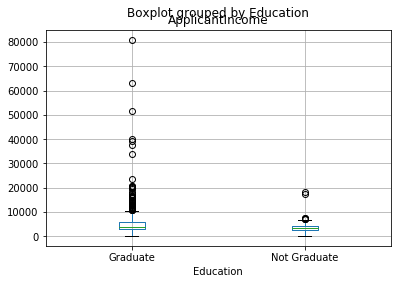

In [19]:
#boxplot for ApplicantIncome segregated by Education
train_data.boxplot(column='ApplicantIncome', by='Education')

#here we can see that the mean income of graduates and not graduate is very close
#but there are higher number of graduates with very high income which appear as outliers

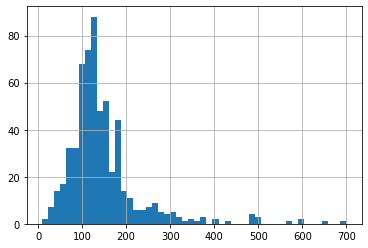

In [20]:
#histogram of LoanAmount
train_data['LoanAmount'].hist(bins=50)

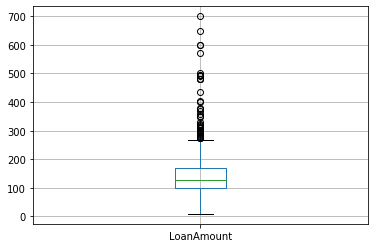

In [21]:
#boxplot of LoanAmount
train_data.boxplot(column = 'LoanAmount')

#LoanAmount aslo has missing as well as extreme values

In [25]:
#finding number of missing values per column and row
def num_missing(x):
    return sum(x.isnull())

print("Missing values in columns: \n")
print(train_data.apply(num_missing, axis = 0))

print("\nMissing values in rows: \n")
print(train_data.apply(num_missing, axis = 1).head())


Missing values in columns: 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Missing values in rows: 

0    1
1    0
2    0
3    0
4    0
dtype: int64


In [28]:
#imputing missing value
#we update the missing values with overall mean/median/mode of the column
#here we will impute gender, married and self_employed with there respective mode value

from scipy.stats import mode

#calculating mode
mode(train_data['Gender']).mode[0]

#imputing the value
train_data['Gender'].fillna(mode(train_data['Gender']).mode[0], inplace = True)
train_data['Married'].fillna(mode(train_data['Married']).mode[0], inplace = True)
train_data['Self_Employed'].fillna(mode(train_data['Self_Employed']).mode[0], inplace = True)

#check again for missing values
train_data.apply(num_missing, axis = 0)

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [92]:
#pivot table for value loanamount on indexs - gender,married,self_Employed
temp1 = train_data.pivot_table(values='Loan_Status', index=['Credit_History'], 
                               aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())

temp2 = train_data.pivot_table(values='LoanAmount', index=['Gender','Married','Self_Employed'], aggfunc=np.mean)

temp3 = train_data.pivot_table(values='Loan_Status', index = ['Married'], 
                               aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())

temp4 = train_data.pivot_table(values='Loan_Status', index=['Gender'], 
                               aggfunc= lambda x: x.map({'Y':0, 'N':1}).mean())

temp5 = pd.crosstab(columns = train_data['Loan_Status'] , 
                    index = [train_data['Gender'],train_data['Credit_History']])

print("Frequency Table for Credit_History: \n")
print(train_data['Credit_History'].value_counts(ascending = True))

print("\nProbability of getting loan for each credit_history class: \n", temp1)

print("\nProbability of getting loan for each Marital status class: \n", temp3)

print("\nProbability of getting loan for each Gender class: \n", temp4)

print("\nLoan Amount for each gender, married and self_employed class: \n", temp2)

print(temp5)



Frequency Table for Credit_History: 

0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting loan for each credit_history class: 
                 Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789

Probability of getting loan for each Marital status class: 
          Loan_Status
Married             
No          0.629108
Yes         0.718204

Probability of getting loan for each Gender class: 
         Loan_Status
Gender             
Female     0.330357
Male       0.308765

Loan Amount for each gender, married and self_employed class: 
                               LoanAmount
Gender Married Self_Employed            
Female No      No             114.691176
               Yes            125.800000
       Yes     No             134.222222
               Yes            282.250000
Male   No      No             129.936937
               Yes            180.588235
       Yes     No             153.882736
               Ye

<Figure size 576x288 with 0 Axes>

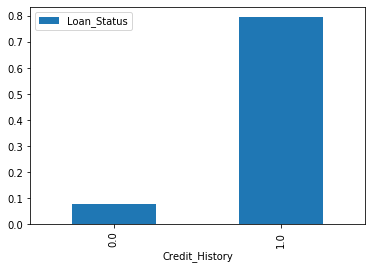

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(8,4))

ax1.set_xlabel("Probability of getting a loan")
ax1.set_ylabel("Credit history")
temp1.plot(kind='bar')

Text(17.200000000000003, 0.5, 'Credit history')

<Figure size 576x288 with 0 Axes>

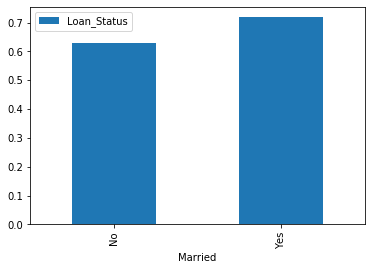

In [60]:
fig = plt.figure(figsize=(8,4))

temp3.plot(kind='bar')
chart1.set_xlabel("Probability of getting a loan")
chart1.set_ylabel("Credit history")


Text(17.200000000000003, 0.5, 'Credit history')

<Figure size 576x288 with 0 Axes>

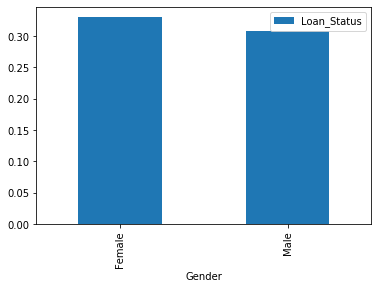

In [62]:
fig = plt.figure(figsize=(8,4))

temp4.plot(kind='bar')
chart1.set_xlabel("Probability of getting a loan")
chart1.set_ylabel("Credit history")

Text(17.200000000000003, 0.5, 'Credit history')

<Figure size 576x288 with 0 Axes>

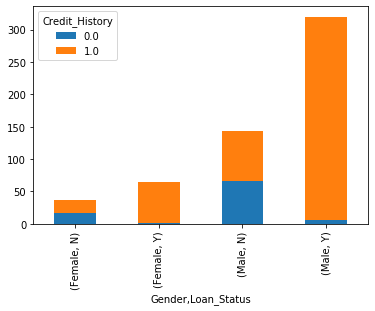

In [91]:
fig = plt.figure(figsize=(8,4))

temp5.plot(kind='bar', stacked=True)
chart1.set_xlabel("Probability of getting a loan")
chart1.set_ylabel("Credit history")